In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
#source('tests.R')
#source('cleanup.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [3]:
redwine <- read_delim("data/winequality-red.csv", delim = ";")
redwine

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double()
)



fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5
6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,6


In [4]:
good_redwine <- redwine %>%
    filter(quality > 5) %>%
    mutate(quality = "good")
bad_redwine <- redwine %>%
    filter(quality <= 5) %>%
    mutate(quality = "bad") 
redwine_new <- rbind(good_redwine, bad_redwine)
redwine_new

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,good
7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,good
7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,good
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.6,0.725,0.20,7.8,0.073,29,79,0.99770,3.29,0.54,9.2,bad
6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,bad
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,bad


In [5]:
glimpse(redwine_new)

Rows: 1,599
Columns: 12
$ `fixed acidity`        <dbl> 11.2, 7.3, 7.8, 8.5, 7.9, 8.9, 6.9, 7.8, 6.9, …
$ `volatile acidity`     <dbl> 0.280, 0.650, 0.580, 0.280, 0.320, 0.220, 0.40…
$ `citric acid`          <dbl> 0.56, 0.00, 0.02, 0.56, 0.51, 0.48, 0.14, 0.00…
$ `residual sugar`       <dbl> 1.9, 1.2, 2.0, 1.8, 1.8, 1.8, 2.4, 2.0, 2.5, 1…
$ chlorides              <dbl> 0.075, 0.065, 0.073, 0.092, 0.341, 0.077, 0.08…
$ `free sulfur dioxide`  <dbl> 17, 15, 9, 35, 17, 29, 21, 8, 22, 40, 5, 3, 13…
$ `total sulfur dioxide` <dbl> 60, 21, 18, 103, 56, 60, 40, 16, 37, 83, 18, 1…
$ density                <dbl> 0.9980, 0.9946, 0.9968, 0.9969, 0.9969, 0.9968…
$ pH                     <dbl> 3.16, 3.39, 3.36, 3.30, 3.04, 3.39, 3.43, 3.38…
$ sulphates              <dbl> 0.58, 0.47, 0.57, 0.75, 1.08, 0.53, 0.63, 0.59…
$ alcohol                <dbl> 9.8, 10.0, 9.5, 10.5, 9.2, 9.4, 9.7, 9.8, 10.6…
$ quality                <chr> "good", "good", "good", "good", "good", "good"…


From using the glimpse function, we see that the 'quality' variable is of type character. We want to change to this a factor, as shown below.

In [6]:
redwine_newfct <- redwine_new %>%
    mutate(quality = as_factor(quality))
    glimpse(redwine_newfct)

Rows: 1,599
Columns: 12
$ `fixed acidity`        <dbl> 11.2, 7.3, 7.8, 8.5, 7.9, 8.9, 6.9, 7.8, 6.9, …
$ `volatile acidity`     <dbl> 0.280, 0.650, 0.580, 0.280, 0.320, 0.220, 0.40…
$ `citric acid`          <dbl> 0.56, 0.00, 0.02, 0.56, 0.51, 0.48, 0.14, 0.00…
$ `residual sugar`       <dbl> 1.9, 1.2, 2.0, 1.8, 1.8, 1.8, 2.4, 2.0, 2.5, 1…
$ chlorides              <dbl> 0.075, 0.065, 0.073, 0.092, 0.341, 0.077, 0.08…
$ `free sulfur dioxide`  <dbl> 17, 15, 9, 35, 17, 29, 21, 8, 22, 40, 5, 3, 13…
$ `total sulfur dioxide` <dbl> 60, 21, 18, 103, 56, 60, 40, 16, 37, 83, 18, 1…
$ density                <dbl> 0.9980, 0.9946, 0.9968, 0.9969, 0.9969, 0.9968…
$ pH                     <dbl> 3.16, 3.39, 3.36, 3.30, 3.04, 3.39, 3.43, 3.38…
$ sulphates              <dbl> 0.58, 0.47, 0.57, 0.75, 1.08, 0.53, 0.63, 0.59…
$ alcohol                <dbl> 9.8, 10.0, 9.5, 10.5, 9.2, 9.4, 9.7, 9.8, 10.6…
$ quality                <fct> good, good, good, good, good, good, good, good…


To check and see exactly what levels we have in the 'quality' column, we use  the 'levels' function. By doing so, we verify that our desired classes of 'good' and 'bad' are present. This is shown below. 

In [7]:
redwine_newfct %>%
    pull(quality) %>%
    levels()

[1] "good" "bad"

In [8]:
redwine_num_obs <- nrow(redwine_newfct) 
redwine_newfct %>%
    group_by(quality) %>%
    summarize(count = n(),
             percentage = n() / redwine_num_obs * 100)

`summarise()` ungrouping output (override with `.groups` argument)



quality,count,percentage
<fct>,<int>,<dbl>
good,855,53.47092
bad,744,46.52908


From this, we see that there is more good quality wine than there is bad. The difference is not too large (~6.9%), so there is no noticeable pattern to draw from this that will help in our classification. We will continue exploring the data to see what else we can draw from this data set.

In [9]:
names(redwine_newfct)

[1] "fixed acidity"        "volatile acidity"     "citric acid"         
 [4] "residual sugar"       "chlorides"            "free sulfur dioxide" 
 [7] "total sulfur dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"

The following two code lines produce information that aid us in better predicting which predictor variables will be best fit for this classification project. Those with three asterisks indicate a possibly better trend, and therefore the lower the number of asterisks indicate a possibly worse trend. We will be establishing these aforementioned trends by exploring the possible predictor variables when coupled together, steps that are to be taken later on in this project.

In [10]:
mod <- glm(quality ~ ., data = redwine_newfct, family = "binomial")

In [11]:
summary(mod)


Call:
glm(formula = quality ~ ., family = "binomial", data = redwine_newfct)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3142  -0.8300  -0.3105   0.8387   3.4025  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -42.949948  79.473979  -0.540  0.58890    
`fixed acidity`         -0.135980   0.098483  -1.381  0.16736    
`volatile acidity`       3.281694   0.488214   6.722 1.79e-11 ***
`citric acid`            1.274347   0.562730   2.265  0.02354 *  
`residual sugar`        -0.055326   0.053770  -1.029  0.30351    
chlorides                3.915713   1.569298   2.495  0.01259 *  
`free sulfur dioxide`   -0.022220   0.008236  -2.698  0.00698 ** 
`total sulfur dioxide`   0.016394   0.002882   5.688 1.29e-08 ***
density                 50.932385  81.148745   0.628  0.53024    
pH                       0.380608   0.720203   0.528  0.59717    
sulphates               -2.795107   0.452184  -6.181 6.36e-10 ***
a

In [12]:
set.seed(2402)

redwine_split <- initial_split(redwine_newfct, prop = 0.6, strata = quality)
redwine_train <- training(redwine_split)
redwine_test <- testing (redwine_split)

redwine_train

#unscaled training dataset

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,good
7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,good
7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,good
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.1,0.715,0.10,2.6,0.053,13,27,0.99362,3.57,0.50,11.9,bad
6.2,0.460,0.29,2.1,0.074,32,98,0.99578,3.33,0.62,9.8,bad
6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,bad


In [26]:
set.seed(3047)

redwine_recipe <- recipe(quality ~., redwine_train) %>%
step_scale(all_predictors()) %>%
step_center(all_predictors())%>%
prep()%>%
bake(redwine_train)

redwine_recipe

# scaled training data scale

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.7332840,-1.4337913,1.574159,-0.4718020,-0.2713397,0.09624791,0.4146453,0.69307096,-1.0138215,-0.4552517,-0.5888013,good
-0.5440235,0.6916737,-1.359586,-0.9922829,-0.4827046,-0.09251204,-0.7850240,-1.14416093,0.4619946,-1.0751688,-0.3985084,good
-0.2520610,0.2895587,-1.254809,-0.3974476,-0.3136127,-0.65879187,-0.8773062,0.04463618,0.2694969,-0.5116078,-0.8742406,good
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
-1.244733,1.0650662,-0.8357025,0.04867891,-0.73634247,-0.281272,-0.6004595,-1.6737160,1.6169812,-0.9061005,1.4092742,bad
-1.186341,-0.3997813,0.1596752,-0.32309318,-0.29247618,1.511948,1.5835538,-0.5065334,0.0769991,-0.2298272,-0.5888013,bad
-1.186341,0.4044487,-0.9404791,-0.39744760,0.04570766,1.511948,-0.0775267,-0.9820522,0.8469901,-0.4552517,0.0772239,bad


In [27]:
redwine_rename <- redwine_recipe %>%
rename(fixed_acidity = "fixed acidity",
      volatile_acidity = "volatile acidity",
      citric_acid = "citric acid",
      residual_sugar = "residual sugar",
      free_sulfur_dioxide = "free sulfur dioxide",
      total_sulfur_dioxide = "total sulfur dioxide")
redwine_rename

# renamed the columns of the redwine_recipe dataset

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.7332840,-1.4337913,1.574159,-0.4718020,-0.2713397,0.09624791,0.4146453,0.69307096,-1.0138215,-0.4552517,-0.5888013,good
-0.5440235,0.6916737,-1.359586,-0.9922829,-0.4827046,-0.09251204,-0.7850240,-1.14416093,0.4619946,-1.0751688,-0.3985084,good
-0.2520610,0.2895587,-1.254809,-0.3974476,-0.3136127,-0.65879187,-0.8773062,0.04463618,0.2694969,-0.5116078,-0.8742406,good
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
-1.244733,1.0650662,-0.8357025,0.04867891,-0.73634247,-0.281272,-0.6004595,-1.6737160,1.6169812,-0.9061005,1.4092742,bad
-1.186341,-0.3997813,0.1596752,-0.32309318,-0.29247618,1.511948,1.5835538,-0.5065334,0.0769991,-0.2298272,-0.5888013,bad
-1.186341,0.4044487,-0.9404791,-0.39744760,0.04570766,1.511948,-0.0775267,-0.9820522,0.8469901,-0.4552517,0.0772239,bad


Using the standardized values from the columns, we establish the following graphs, where we keep the 'alcohol' on the y-axis and change the x-axis variable. The reason for this is because we observed that alcohol displayed a good trend, which we would like to keep as a potential predictor variable. Therefore, we will continue to test the remaining variables on the x-axis to see which second predictor variable would be a good fit for coming up with a predictive question.

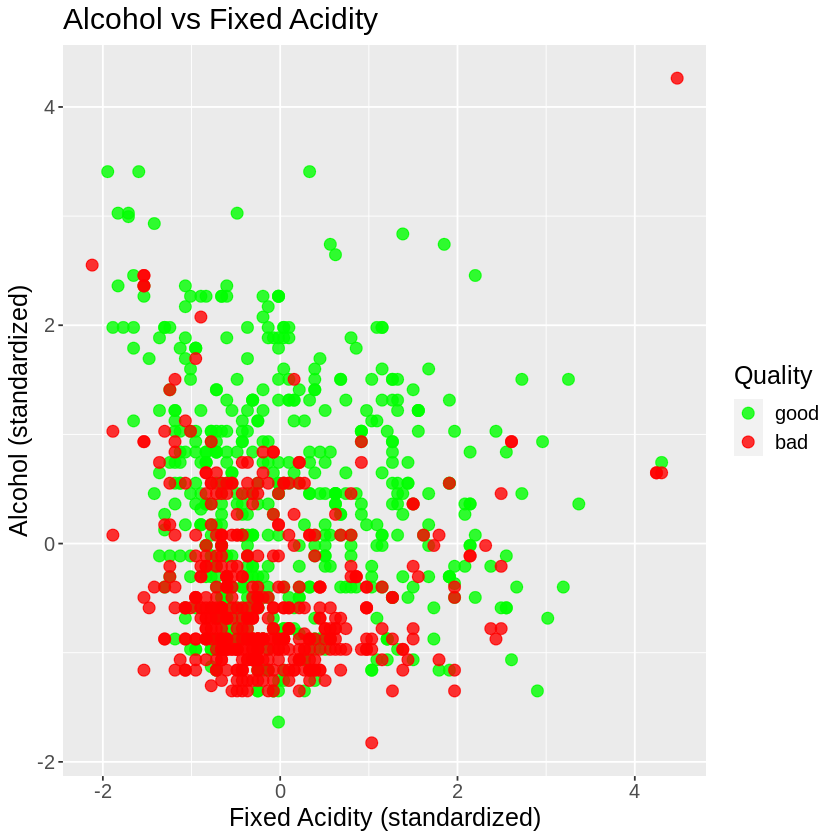

In [34]:
fixed_acidity_alcohol <- redwine_rename %>%
    ggplot(aes(x = fixed_acidity, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "Fixed Acidity (standardized)", 
         y = "Alcohol (standardized)",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15)) +
ggtitle("Alcohol vs Fixed Acidity")
fixed_acidity_alcohol

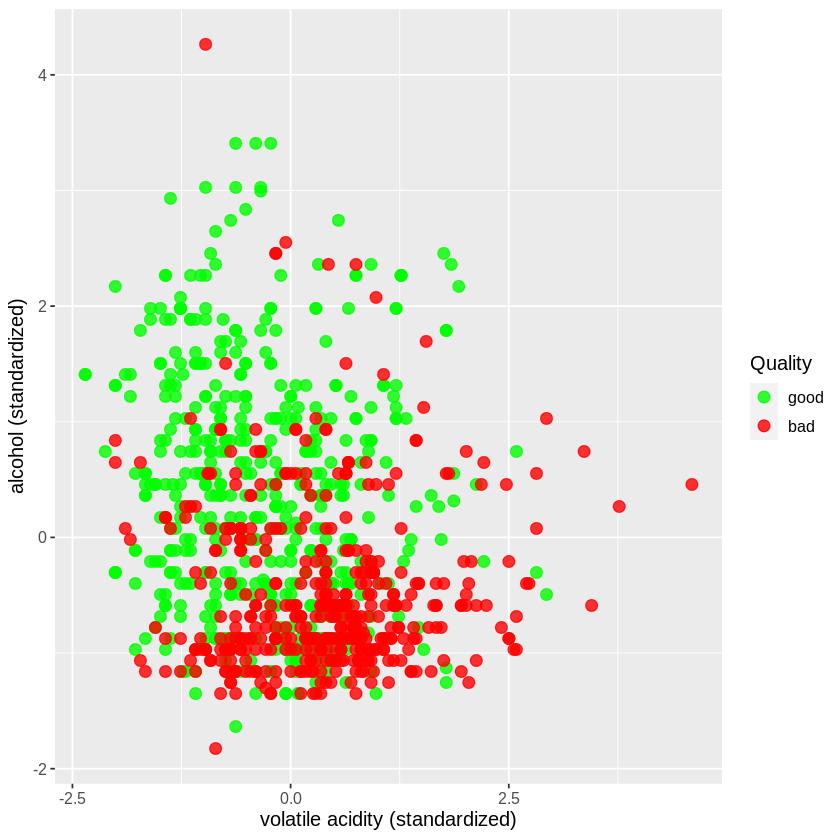

In [31]:
volatile_acidity_alcohol <- redwine_rename %>%
    ggplot(aes(x = volatile_acidity, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "volatile acidity (standardized)", 
         y = "alcohol (standardized)",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 12))
volatile_acidity_alcohol

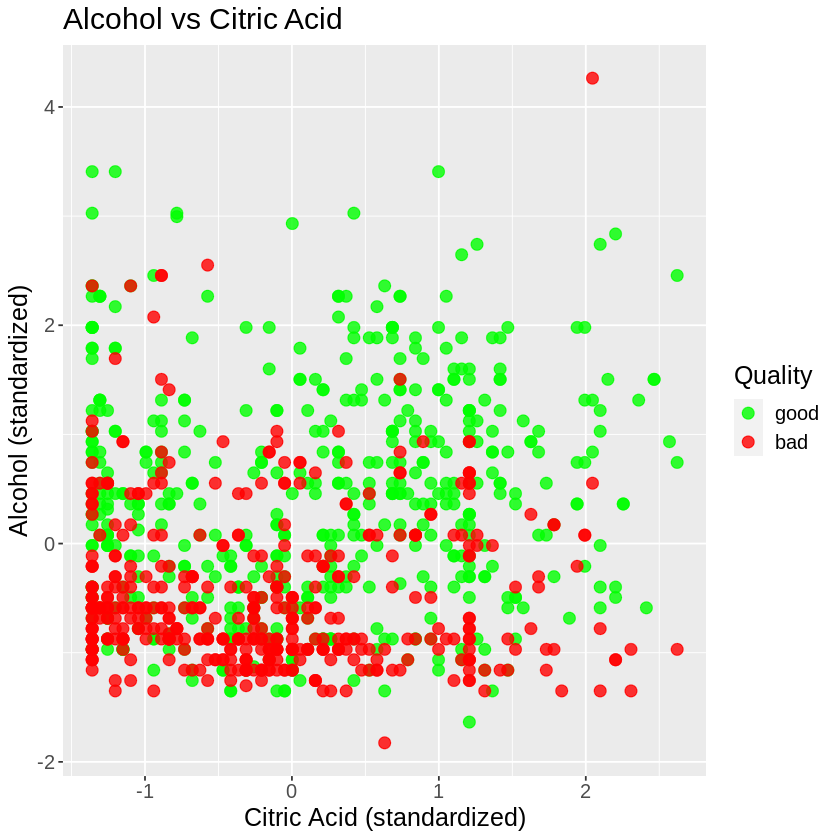

In [35]:
citric_acid_alcohol <- redwine_rename %>%
    ggplot(aes(x = citric_acid, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "Citric Acid (standardized)", 
         y = "Alcohol (standardized)",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15)) +
ggtitle("Alcohol vs Citric Acid")
citric_acid_alcohol

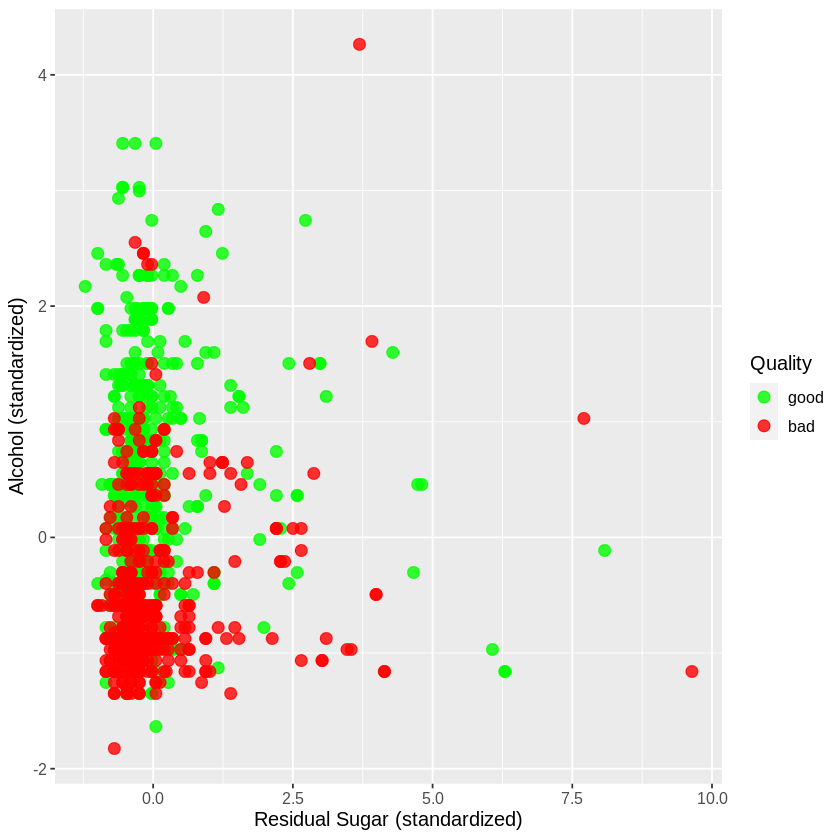

In [19]:
residual_sugar_alcohol <- redwine_rename %>%
    ggplot(aes(x = residual_sugar, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "Residual Sugar (standardized)", 
         y = "Alcohol (standardized)",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 12))
residual_sugar_alcohol

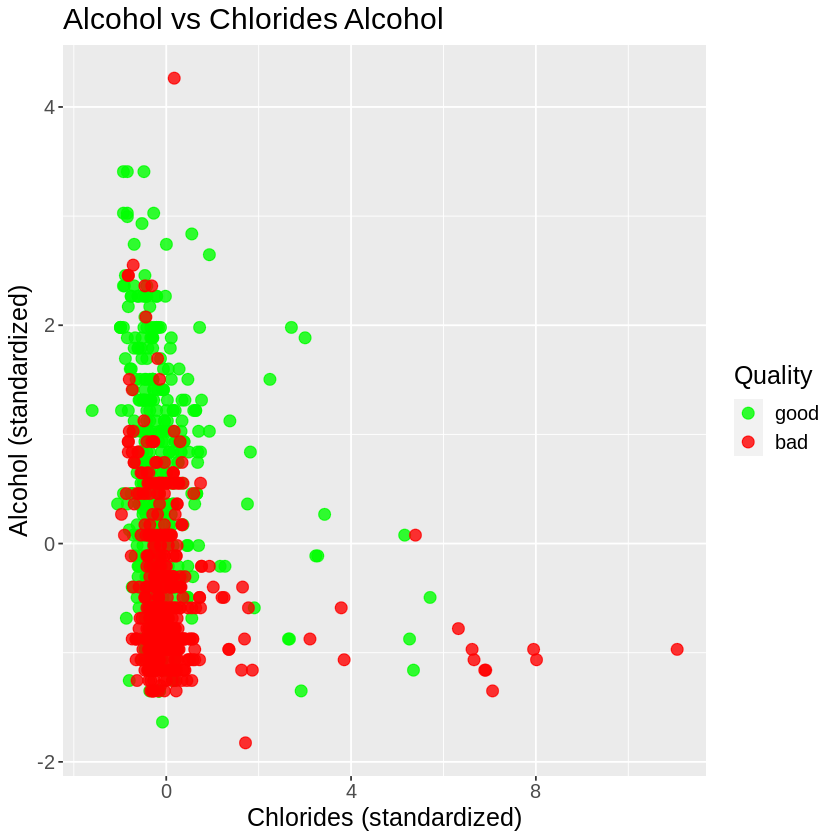

In [36]:
chlorides_alcohol <- redwine_rename %>%
    ggplot(aes(x = chlorides, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "Chlorides (standardized)", 
         y = "Alcohol (standardized)",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15)) +
ggtitle("Alcohol vs Chlorides Alcohol")
chlorides_alcohol

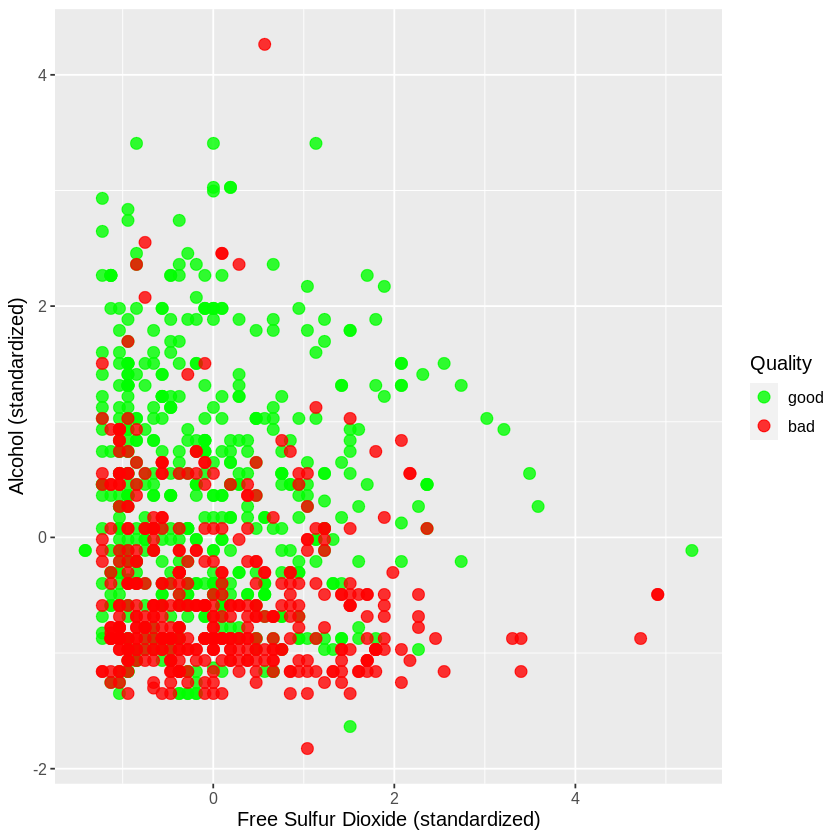

In [21]:
free_sulfur_dioxide_alcohol <- redwine_rename %>%
    ggplot(aes(x = free_sulfur_dioxide, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "Free Sulfur Dioxide (standardized)", 
         y = "Alcohol (standardized)",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 12))
free_sulfur_dioxide_alcohol

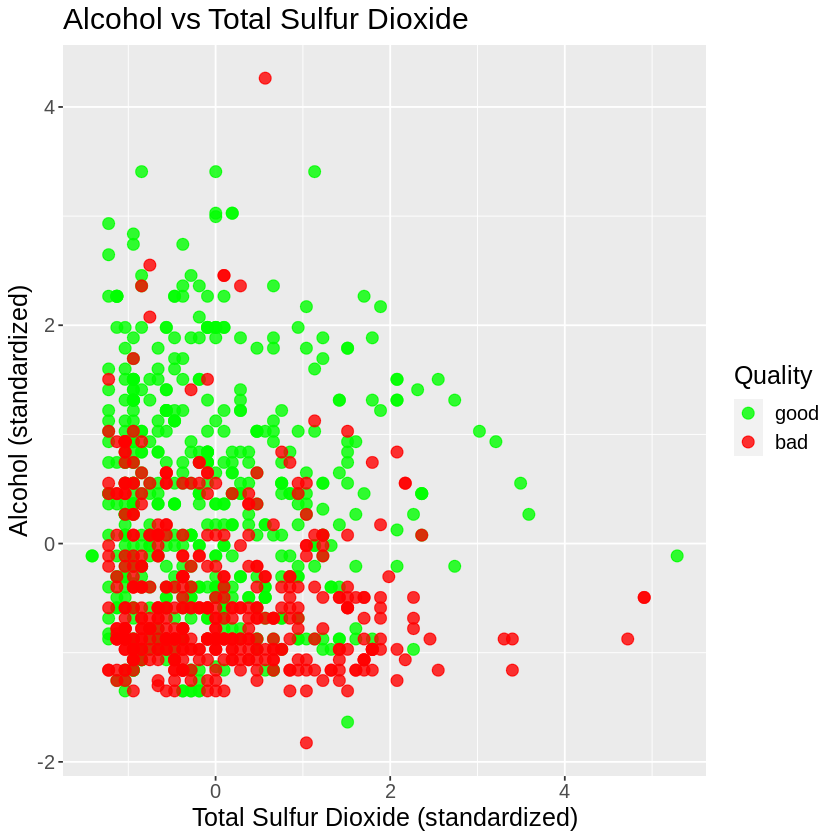

In [37]:
total_sulfur_dioxide_alcohol <- redwine_rename %>%
    ggplot(aes(x = free_sulfur_dioxide, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "Total Sulfur Dioxide (standardized)", 
         y = "Alcohol (standardized)",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15)) +
ggtitle("Alcohol vs Total Sulfur Dioxide")
total_sulfur_dioxide_alcohol

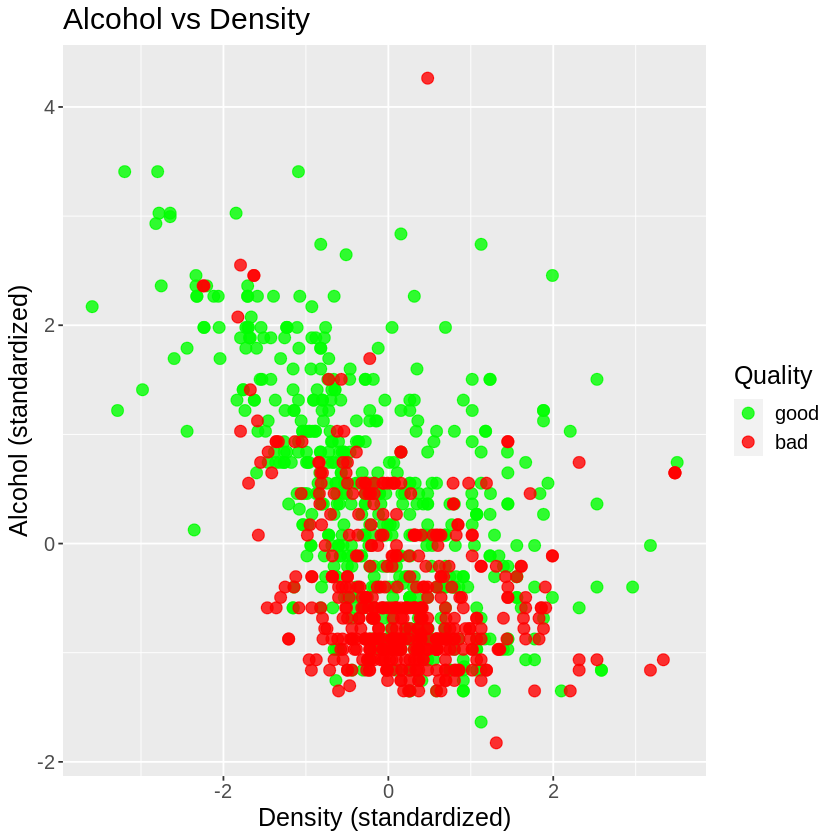

In [42]:
density_alcohol <- redwine_rename %>%
    ggplot(aes(x = density, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "Density (standardized)", 
         y = "Alcohol (standardized)",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15))+
ggtitle("Alcohol vs Density")
density_alcohol

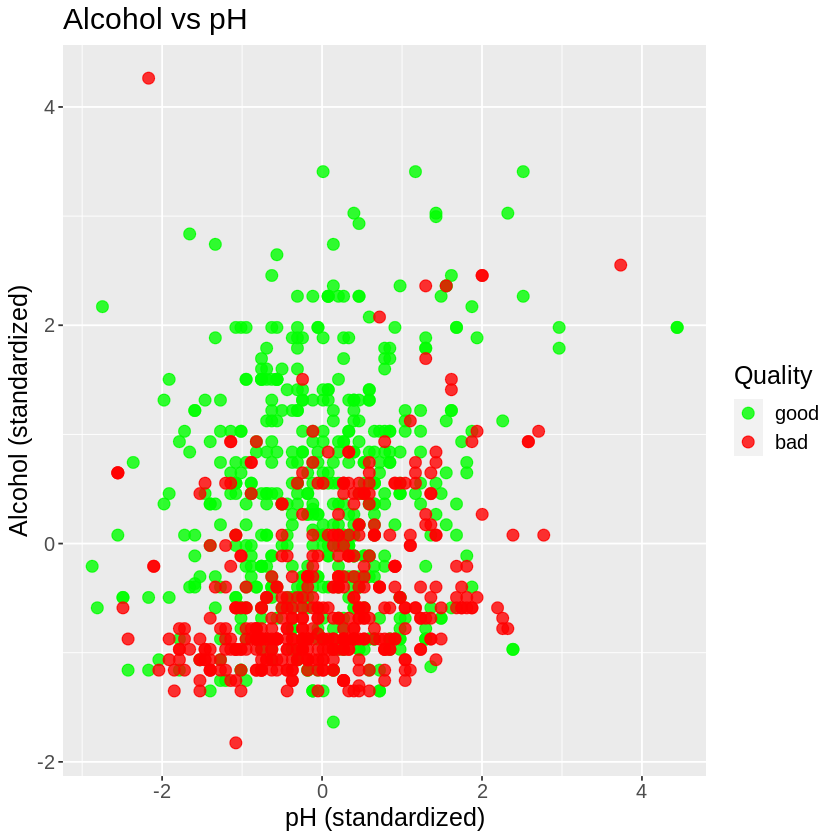

In [39]:
pH_alcohol <- redwine_rename %>%
    ggplot(aes(x = pH, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "pH (standardized)", 
         y = "Alcohol (standardized)",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15)) +
ggtitle("Alcohol vs pH")

pH_alcohol

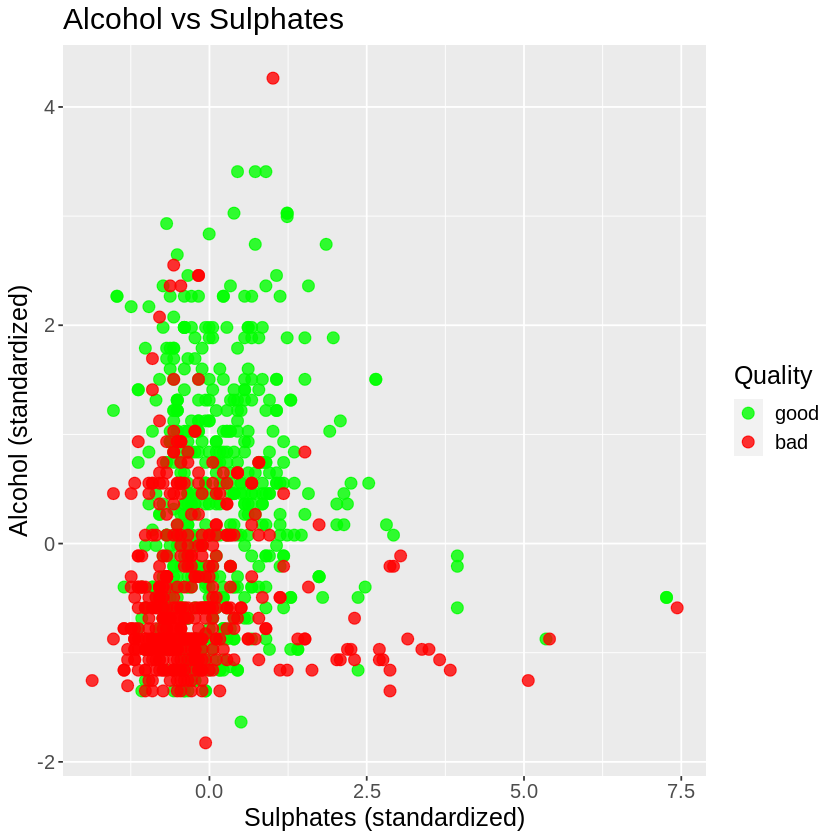

In [40]:
sulphates_alcohol <- redwine_rename %>%
    ggplot(aes(x = sulphates, y = alcohol, color = quality)) +
    geom_point(alpha = 0.8, size = 3) +
    labs(x = "Sulphates (standardized)", 
         y = "Alcohol (standardized)",
         color = "Quality") +
    scale_color_manual(values = c("green", "red")) +
    theme(text = element_text(size = 15)) +
ggtitle("Alcohol vs Sulphates")
sulphates_alcohol

We want to create a workflow to skip intermediate steps later on, which will allow for a smoother coding experience. Further, we used fit() to combine all the steps of creating the model, recipe, and training data in realtion to the aforementioned (ex. applies all that has been done to a data set to predict the observation we want). 

In [25]:
#WE WILL NOT BE TOUCHING THIS UNTIL WE DETERMINE THE PREDICTOR VARIABLES TO BE USED
#WE WILL NOT BE TOUCHING THIS UNTIL WE DETERMINE THE PREDICTOR VARIABLES TO BE USED
#WE WILL NOT BE TOUCHING THIS UNTIL WE DETERMINE THE PREDICTOR VARIABLES TO BE USED
#WE WILL NOT BE TOUCHING THIS UNTIL WE DETERMINE THE PREDICTOR VARIABLES TO BE USED
#WE WILL NOT BE TOUCHING THIS UNTIL WE DETERMINE THE PREDICTOR VARIABLES TO BE USED
#WE WILL NOT BE TOUCHING THIS UNTIL WE DETERMINE THE PREDICTOR VARIABLES TO BE USED

# set.seed(1000)

# redwine <- read_delim("data/winequality-red.csv", delim = ";") %>%
#     mutate(quality = as_factor(quality))

# new_wine <- tibble(pH = 3.5,
#                   alcohol = 13)

# knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) %>%
#        set_engine("kknn") %>%
#        set_mode("classification")

# redwine_recipe <- recipe(quality ~ pH + alcohol, data = redwine_newfct) %>%
#     step_scale(all_predictors()) %>%
#     step_center(all_predictors())
                         
# redwine_fit <- workflow() %>%
#         add_recipe(redwine_recipe) %>%
#         add_model(knn_spec) %>%
#         fit(data = redwine_new)

# wine_predict <- predict(redwine_fit, new_wine)
# wine_predict